## Loading Data & Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [7]:
data = pd.read_excel("/content/Coffee Shop Sales.xlsx")

In [8]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [9]:
data.shape

(149116, 11)

In [ ]:
data.isna().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [12]:
data.duplicated().any()

np.False_

In [13]:
columnValue = data.nunique().reset_index()
columnValue.rename(columns = {"index" : "Column _name", 0 : "Uniue values"}, inplace = True)
columnValue

,Column _name,Uniue values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [14]:

data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [15]:

data.describe(include = object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## **Univariate Analysis** & **Visualization**

In [19]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):

    if x_axis:
        order = data[x_axis].value_counts().iloc[:top].index

    else :
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [22]:
def pie_plot(column_name, explodeIndex = None):

    explodeList = [0] * data[column_name].nunique()

    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1

    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

### Discovering `transaction_date` column

In [23]:
data["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]

In [25]:
data["year"] = data["transaction_date"].dt.year
data["month"] = data["transaction_date"].dt.month_name()
data["day"] = data["transaction_date"].dt.day_name()

**Discovering this columns **

In [26]:
data["year"].unique()

array([2023], dtype=int32)

**Sales exclusively from 2023.**

In [27]:
data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

<ipython-input-19-49541ed019f7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


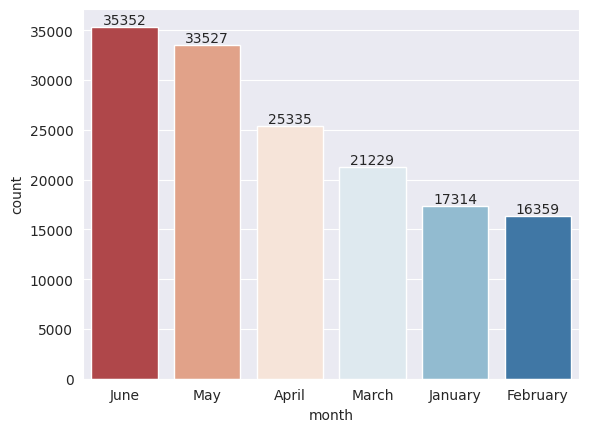

In [28]:
count_plot(x_axis = "month")

** Most sales within a six-month period**

In [29]:
data["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

<ipython-input-19-49541ed019f7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


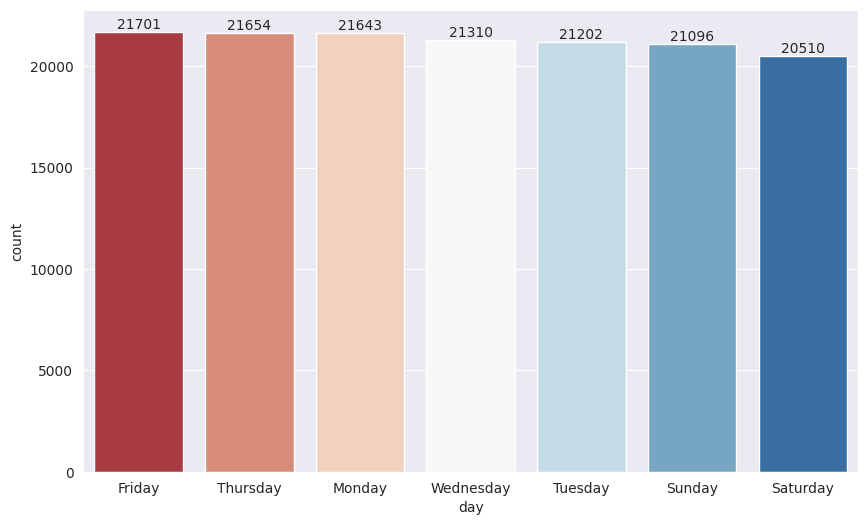

In [30]:
plt.figure(figsize = (10,6))
count_plot(x_axis = "day")

### Discovering `transaction_time` column

In [33]:
data["transaction_time"].unique()[:50]

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), datetime.time(7, 20, 24),
       datetime.time(7, 22, 41), datetime.time(7, 25, 49),
       datetime.time(7, 33, 34), datetime.time(7, 39, 13),
       datetime.time(7, 39, 34), datetime.time(7, 43, 5),
       datetime.time(7, 44, 35), datetime.time(7, 45, 51),
       datetime.time(7, 48, 19), datetime.time(7, 52, 36),
       datetime.time(7, 59, 58), datetime.time(8, 0, 18),
       datetime.time(8, 0, 39), datetime.time(8, 11, 45),
       datetime.time(8, 17, 27), datetime.time(8, 24, 26),
       datetime.time(8, 29, 38), datetime.time(8, 31, 23),
       datetime.time(8, 33, 8), datetime.time(8, 35, 3),
       datetime.time(8, 41, 57), datetime.time(8, 52, 3),
       datetime.time(8, 52, 32), datetime.time(8, 54, 33),
       datetime.time(8, 56, 27), datetime.time(8, 57, 46),
       datetime.time(8, 58, 55), datetime.time(9, 0, 12),
       datetime.time(9, 0, 24), datetime.time(9, 7, 13),
       da

**Extract some information such as `hour`**

In [34]:
data["hour"] = data["transaction_time"].apply(lambda x : x.hour)

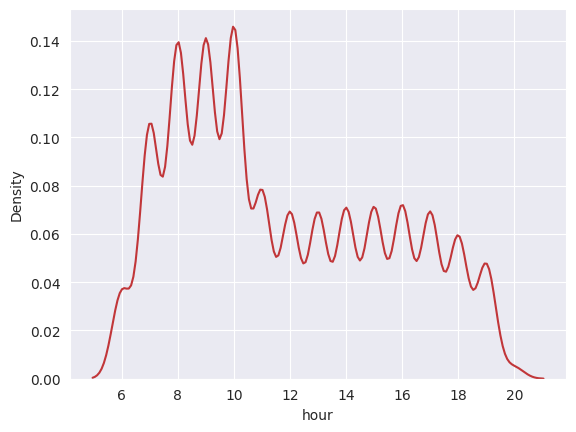

In [35]:


sns.kdeplot(data["hour"])
plt.show()

** Most sales were from 8 am to 11 pm**

In [38]:
data["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

<ipython-input-19-49541ed019f7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


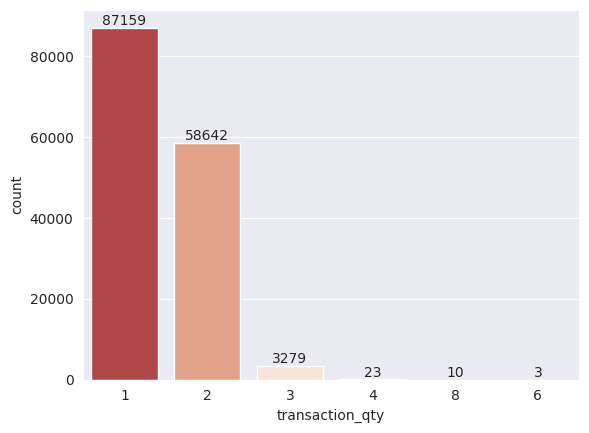

In [39]:
 count_plot(x_axis = "transaction_qty")

### Discovering `store_location` column

In [40]:


data["store_location"].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

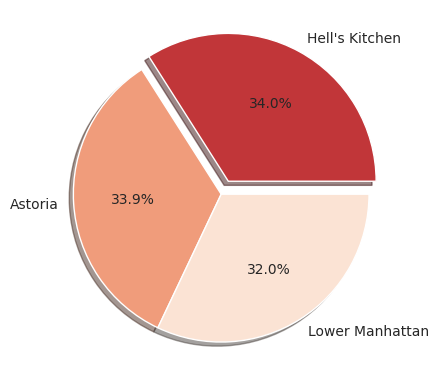

In [41]:


pie_plot(column_name = "store_location", explodeIndex = 0)

** The sales rates of the three stores were similar, with the most significant difference observed at the Hell's Kitchen store**

### Discovering `unit_price` column

In [42]:


data["unit_price"].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

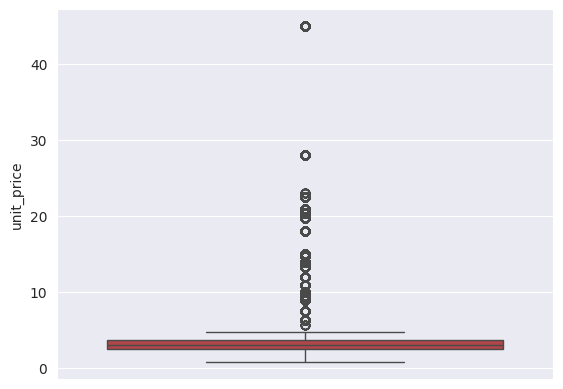

In [43]:


sns.boxplot(y = "unit_price", data = data)

**🧩 One might assume the presence of `outliers`, but such variations are expected in different types of coffee**

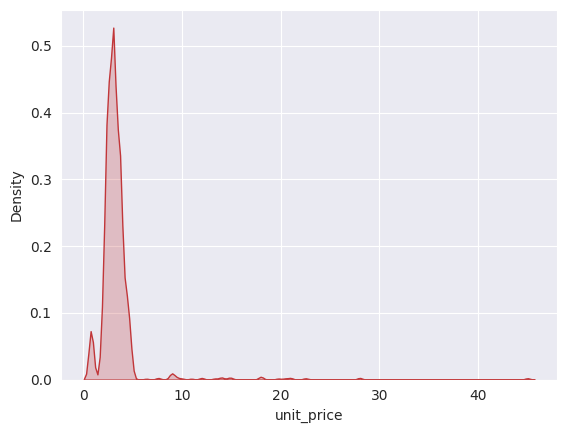

In [44]:


sns.kdeplot(x = data["unit_price"], fill = True)
plt.show()

### Discovering `product_category` column

In [45]:
data["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [ ]:

plt.figure(figsize = (15,6))
count_plot(x_axis = "product_category")

** We can see :**
   - it's evident that the three stores offer a wide range of services.
   - `Coffee` stands as the best-selling product.
   - `Tea` also exhibits a high sales rate.

### Discovering `product_type` column

In [ ]:
data["product_type"].unique()

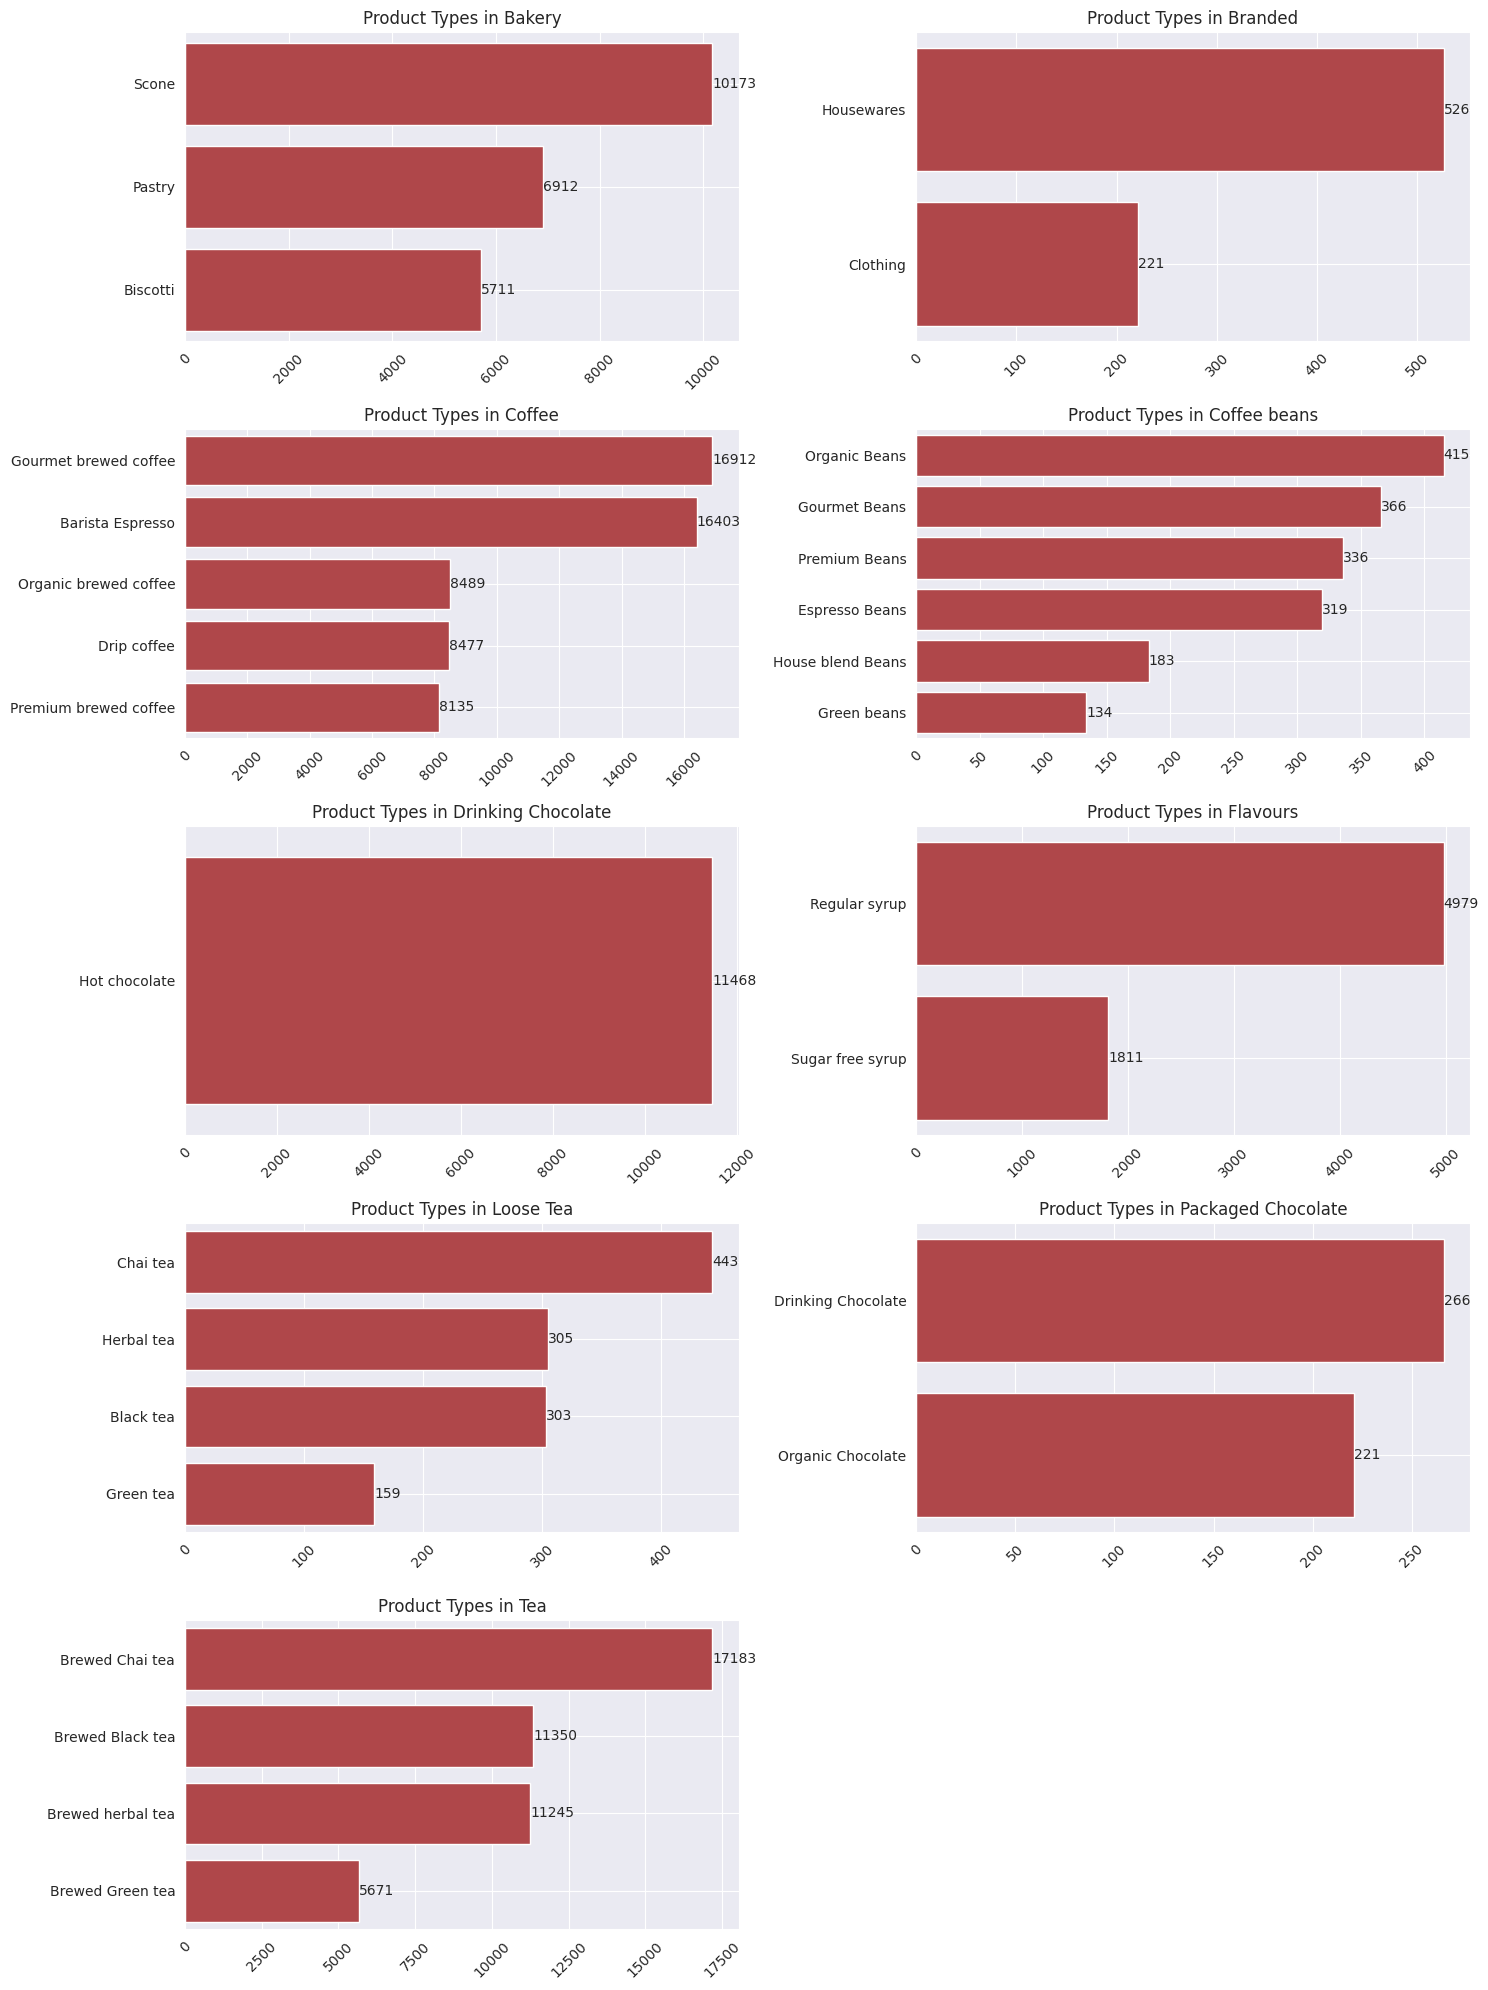

In [46]:

counts = data.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

categories = counts['product_category'].unique()
fig, axes = plt.subplots(5, 2, figsize = (15, 20))


axes = axes.flatten()

for i, category in enumerate(categories):

    subset = counts[counts['product_category'] == category]

    subset = subset.sort_values('count', ascending = False)

    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)

    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Discovering `product_detail` column

In [ ]:


data["product_detail"].unique()

**🛑I decided to `Drop` this column, it's redundant since the same information is presented more effectively in the other columns**

In [49]:


data["Total revenue"] = data["transaction_qty"] * data["unit_price"]

In [50]:


data.sample(5)

,transaction_qty,store_location,unit_price,product_category,product_type,year,month,day,hour,Total revenue
53907,2,Hell's Kitchen,3.75,Coffee,Premium brewed coffee,2023,March,Thursday,9,7.50
138591,1,Lower Manhattan,2.20,Coffee,Gourmet brewed coffee,2023,June,Wednesday,16,2.20
76349,3,Lower Manhattan,4.25,Coffee,Barista Espresso,2023,April,Wednesday,8,12.75
51647,2,Astoria,3.00,Tea,Brewed Black tea,2023,March,Sunday,18,6.00
103809,1,Astoria,2.00,Coffee,Gourmet brewed coffee,2023,May,Monday,11,2.00


## Columns Insights📊📉📈

## Bivariate Analysis & Visualizations

- **Year**, Sales exclusively from 2023.
- **Month**, Most sales within a six-month period
- **Hour**, Most sales were from 8 am to 11 pm
- **Transaction quantity**, Most sales were singles followed by 2 lots
- **Stores**, The sales rates of the three stores were similar, with the most significant difference observed at the `Hell's Kitchen` store
- **Unit price**, Price distribution is `positively skewed`, We understand from this that most Coffee have lower prices,while a few Coffee have higher prices
- **Category :**
     - it's evident that the three stores offer a wide range of services.
     - `Coffee` stands as the best-selling product.
     - `Tea` also exhibits a high sales rate.
- **product type :**
     - In the **Bakery** category, the most sold item is the **scone**
     - In the **Branded** category, the best-selling item is **Housewares**
     - In the **Coffee** category, the best-selling item is **Gourmet brewed coffee**
     - In the **Coffee beans** category, the best-selling item is **Organic Beans**
     - The **Drinking Chocolate** category solely offers **hot chocolate**
     - **Regular syrup** are the top-selling items in the **Flavours** category
     - In the **Loose Tea** category, the best-selling item is **Chai tea**
     - In the **Packaged Chocolate** category, the best-selling item is **Drinking Chocolate**
     - In the **Tea** category, the best-selling item is **Brewed Chai tea**

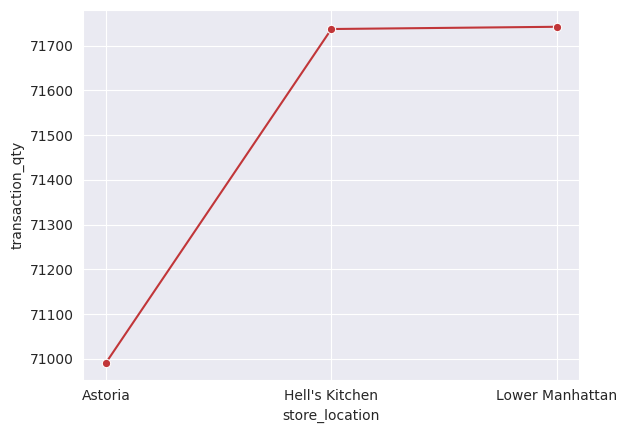

In [51]:

sum_transaction_qty = data.groupby("store_location")["transaction_qty"].sum().reset_index()
sns.lineplot(x = "store_location", y = "transaction_qty", data = sum_transaction_qty, marker = "o")
plt.show()

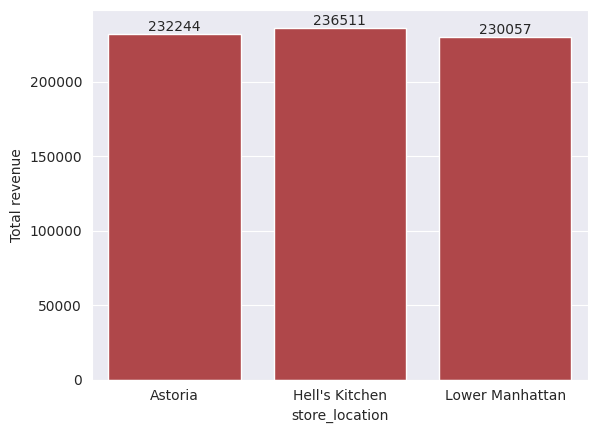

In [52]:

revenue = data.groupby("store_location")["Total revenue"].sum().reset_index()
ax = sns.barplot(x = "store_location", y = "Total revenue", data = revenue)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')

plt.show()

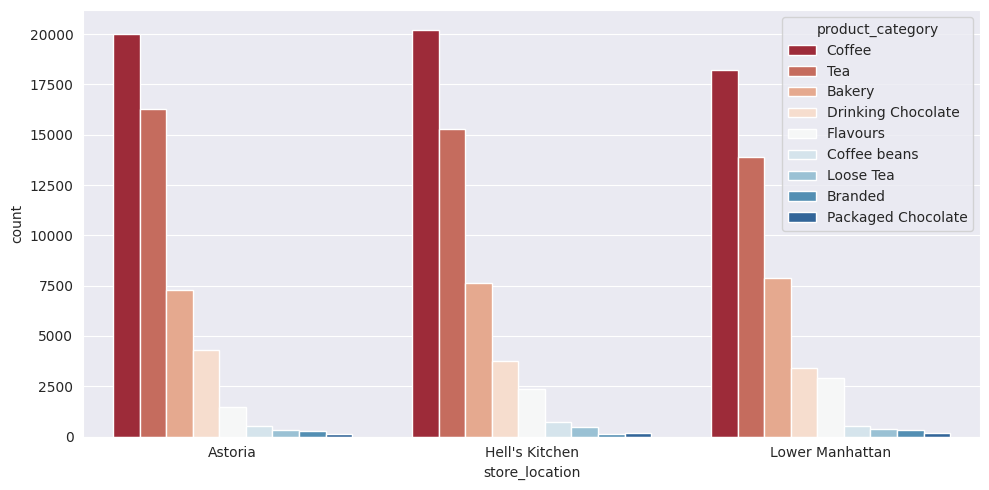

In [53]:
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

plt.figure(figsize=(10, 5))


sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

- **Astoria Store :**
    - The highest selling product category is **Coffee** with a count of **20,025** units
    - Following Coffee, **Tea** stands as the second most popular category with a count of **16,260** units
    - Other categories like Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, and Packaged Chocolate have        varying counts, ranging from **7289** to **110** units, in **descending order**
<p>&nbsp;</p>

- **Hell's Kitchen Store :**
    - Similar to Astoria, **Coffee** leads in sales, amounting to **20,187** units
    - **Tea** follows closely as the second most popular category with **15,277** units
    - Other categories, such as Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Packaged Chocolate, Branded, and Packaged Chocolate, have counts ranging from **7617** to **119** units  
<p>&nbsp;</p>

- **Lower Manhattan Store :**
    - **Coffee** is again the top-selling category with **18,204** units
    - **Tea** follows with **13,912** units
    - Bakery, Drinking Chocolate, Flavours, Coffee beans, Loose Tea, Branded, Packaged Chocolate have counts ranging from **7890** to **180** units, in **descending order**

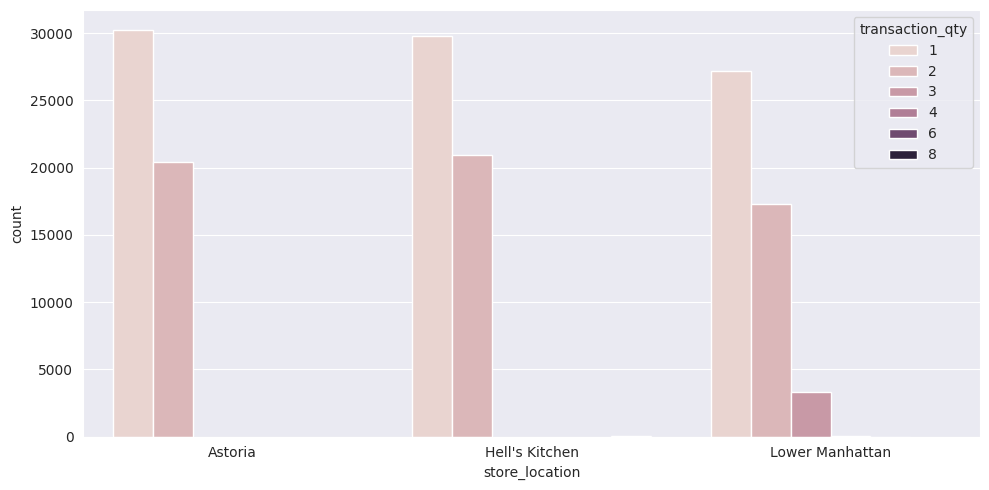

In [54]:

grouped_data = data.groupby("store_location")["transaction_qty"].value_counts().reset_index(name = "count")
plt.figure(figsize=(10, 5))

sns.barplot(x = "store_location", y = "count", hue = "transaction_qty", data = grouped_data)

plt.tight_layout()
plt.show()

- **Astoria Store :**
    - The most frequent transaction quantity observed is **1**, with a count of **30,207** instances
    - The second most frequent transaction quantity is **2**, noted **20,392** times
<p>&nbsp;</p>
- **Hell's Kitchen Store:**
    - The most frequent transaction quantity observed is **1**, noted **29,793** times
    - The second most frequent transaction quantity is **2**, observed **20,932** times
    - Additionally, there are **8** transactions with a quantity of **8**
<p>&nbsp;</p>
- **Lower Manhattan Store:**
    - The most frequent transaction quantity observed is **1**, recorded **27,159** times.
    - The second most frequent transaction quantity is **2**, seen **17,318** times.
    - There are occurrences of transaction quantities **3**, **4**, and **6**, but they are less frequent compared to quantities **1** and **2**

In [ ]:

plt.figure(figsize=(16, 6))

count_plot(x_axis = "hour", hue = "store_location", top = 10)

- **Astoria Store :**
    - Peak hours are from **9 AM** to **10 AM**, and from **4 PM** to **5 PM**, with counts ranging between **5,083** and **5,291** during these periods
    - The least busy hours are from **7 AM** to **8 AM**, with counts ranging between **4,181** and **4,966**
<p>&nbsp;</p>
- **Hell's Kitchen Store :**
    - Busiest hours are from **8 AM** to **10 AM**, with counts ranging between **6,767** and **6,909**
    - The least busy hours are from **6 AM** to **7 AM** and from **6 PM** to **8 PM**
<p>&nbsp;</p>
- **Lower Manhattan Store :**
    - Peak hours are from **9 AM** to **10 AM**, with a count of **6,297**, and from **2 PM** to **3 PM**, with a count of **3,051**
    - The least busy hours are from **7 PM** to **8 PM**, with counts dropping to **75** and **125**

<ipython-input-55-a86d292e2950>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")


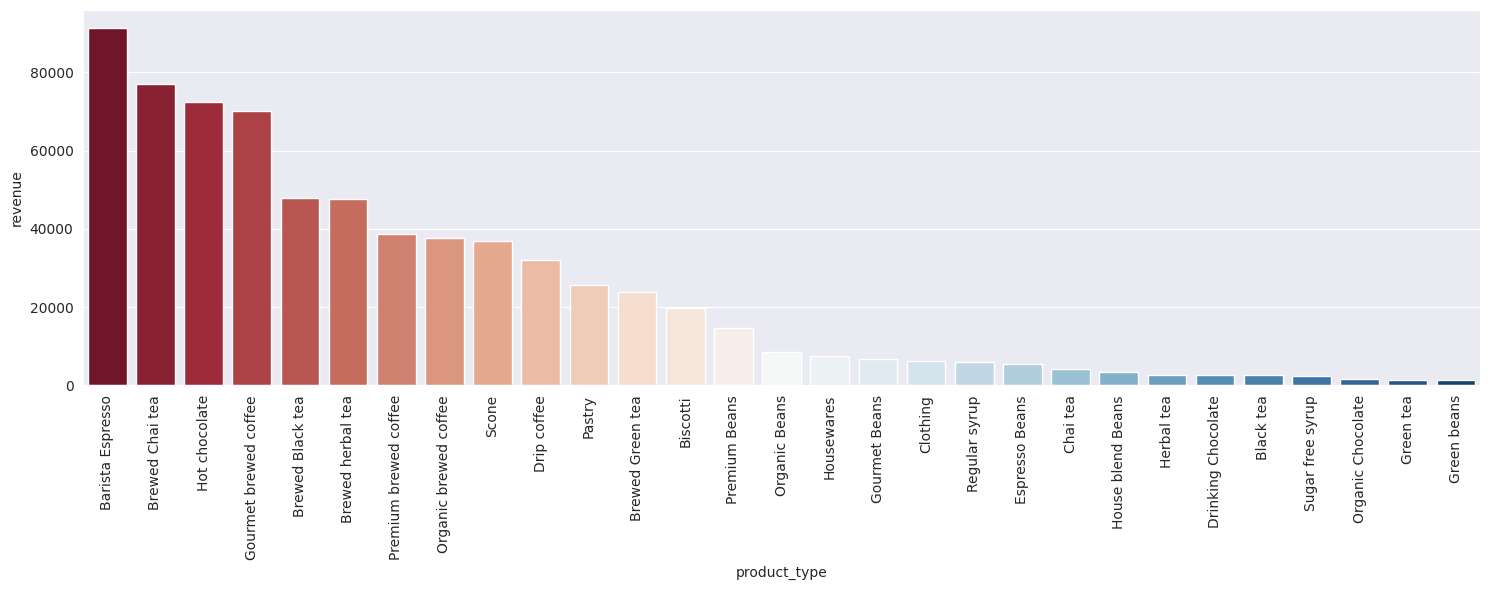

In [55]:

category_revenue = data.groupby("product_type")["Total revenue"].sum().reset_index(name = "revenue")
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(x = "product_type", y = "revenue", data = category_revenue, palette = "RdBu")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

- **Top Revenue Product Types :**
   - **Barista Espresso** with a revenue of **91,406.20**
   - **Brewed Chai tea** with a revenue of **77,081.95**
   - **Hot chocolate** with a revenue of **72,416.00**
   - **Gourmet brewed coffee** with a revenue of **70,034.60**
   - **Brewed Black tea** with a revenue of **47,932.00**
<p>&nbsp;</p>
- **Lowest Revenue Product Types :**
   - **Organic Chocolate** with a revenue of **1,679.60**
   - **Green tea** with a revenue of **1,470.75**
   - **Green beans** with a revenue of **1,340.00**
<p>&nbsp;</p>
- **Other Observations :**
    - Various products contribute to revenue across different ranges, with a mix of beverages (like **teas, coffees**) and snacks (**biscotti, pastries**).
    - **Coffee-related products**, such as various brews and espresso variants, hold prominent positions in revenue generation.
    - The lowest revenue-generating products are predominantly related to **tea** and specific beverage variants.

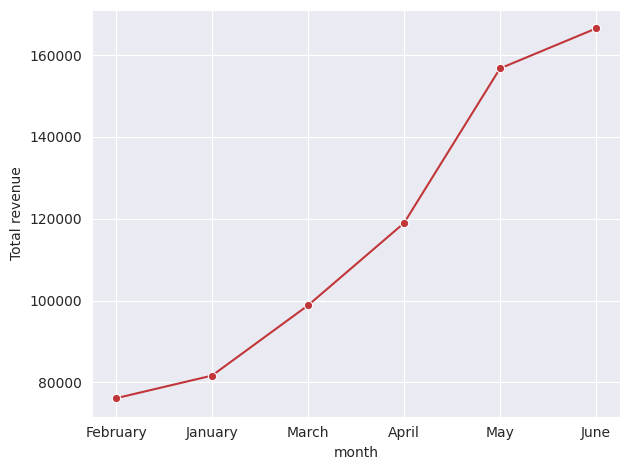

In [56]:

monthly_revenue  = data.groupby("month")["Total revenue"].sum().reset_index().sort_values(by = "Total revenue")

sns.lineplot(x = "month", y = "Total revenue", data = monthly_revenue , marker = "o")

plt.tight_layout()
plt.show()

- **We can see :**
    - **Jun**e had the highest total revenue, reaching **166,485.88**, making it the most profitable month.
    - **May** followed closely behind with a total revenue of **156,727.76**, indicating strong performance.
    - **Apri**l and **March** also performed well, generating revenues of **118,941.08** and **98,834.68**, respectively.
    - **January** and **February** had comparatively lower revenue figures at **81,677.74** and **76,145.19**, respectively.